# Lab assignment 1: Image recognition using deep networks
## Ben Harvey

In [1]:
import tensorflow as tf
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator #preprocessing images

In [2]:
tf.__version__

'2.4.1'

In [3]:
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))
sess

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: GeForce RTX 2070 with Max-Q Design, pci bus id: 0000:01:00.0, compute capability: 7.5



In [4]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15902216952126741289
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6959755424
locality {
  bus_id: 1
  links {
  }
}
incarnation: 2615587735260810500
physical_device_desc: "device: 0, name: GeForce RTX 2070 with Max-Q Design, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


# Exercise one: Identifying handwritten numbers

### Question 1:
Discuss with your group, then describe to your teacher, a list of applications where automatic recognition of hand-written numbers would be useful. (Question 1, 3 points)

**Answer:**
1. Balance detection: paycheck in banks for example 
2. Digital scanner: recognition of text (physical) and transform to digital media (.doc .pdf ..) -> same principle of digits but for letters.
3. Fraud detection: signature patterns


## Data Preparation 

In [5]:
#Load dataset MNIST (labelled handwritten numbers)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [6]:
#size and shape of training set / test set
print((x_train.shape))
print((x_test.shape))

(60000, 28, 28)
(10000, 28, 28)


In [7]:
#Reshape (from 60000x28x28 to 60000x784)
x_train = np.reshape(x_train, (60000,784))
x_test = np.reshape(x_test, (10000,784))
print((x_train.shape))
print((x_test.shape))

(60000, 784)
(10000, 784)


In [8]:
#Rescale (valuews <0,1>)
x_train = x_train / 255 #0 = black = 255 = white
x_test = x_test / 255

In [9]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [10]:
#labeling
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
print(y_train[1])
print(y_test[1])


[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


## Model Definition

In [11]:
model = keras.Sequential()
model.add(keras.layers.Dense(256, input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss='categorical_crossentropy',
    optimizer=keras.optimizers.RMSprop(), metrics='accuracy')


## Training and Evaluation

In [13]:
history = model.fit(x_train, y_train, batch_size=128, 
                    epochs=12, verbose=1, validation_split=0.2)

Epoch 1/12
375/375 [==============================] - 3s 6ms/step - loss: 0.5623 - accuracy: 0.8310 - val_loss: 0.2816 - val_accuracy: 0.9211
Epoch 2/12
375/375 [==============================] - 2s 4ms/step - loss: 0.3045 - accuracy: 0.9120 - val_loss: 0.3078 - val_accuracy: 0.9133
Epoch 3/12
375/375 [==============================] - 2s 5ms/step - loss: 0.2958 - accuracy: 0.9175 - val_loss: 0.3251 - val_accuracy: 0.9076
Epoch 4/12
375/375 [==============================] - 2s 4ms/step - loss: 0.2849 - accuracy: 0.9192 - val_loss: 0.2813 - val_accuracy: 0.9264
Epoch 5/12
375/375 [==============================] - 2s 5ms/step - loss: 0.2832 - accuracy: 0.9213 - val_loss: 0.2850 - val_accuracy: 0.9227
Epoch 6/12
375/375 [==============================] - 2s 4ms/step - loss: 0.2701 - accuracy: 0.9247 - val_loss: 0.2736 - val_accuracy: 0.9253
Epoch 7/12
375/375 [==============================] - 2s 4ms/step - loss: 0.2639 - accuracy: 0.9250 - val_loss: 0.2746 - val_accuracy: 0.9255
Epoch 

### Questions 2-6

1. Show your teacher the text from your console, with how long it took for each epoch to run and the training performance history. (Question 2, 5 points)
2. Plot the training history and show this to your teacher (Question 3, 3 points)
3. Discuss with your group, then describe to your teacher, how the accuracy on the training and validation sets progress differently across epochs, and what this tells us about the generalisation of the model. (Question 4, 5 points).
4. Evaluate the model performance on the test set using the following command: loss, accuracy = model.evaluate(x_test, y_test, verbose=0) Show your teacher what values you get for the model’s accuracy and loss. (Question 5, 2 points)
5. Discuss with your group, then describe to your teacher, whether this accuracy is sufficient for some uses of automatic hand-written digit classification. (Question 6, 5 points) 

### Question 2:

Look the table above it shows how much time by epoch(run all over the dataset) 2ms/step and some epochs with 1ms/step.

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


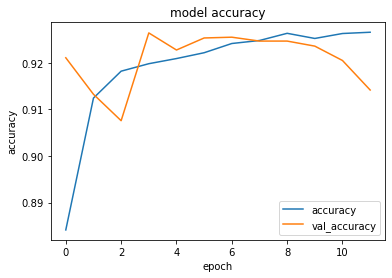

In [14]:
# Question 3:
#plot the models
print(history.history.keys()) #list the dict keys

#Accuracy
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')

plt.legend()

### Question 4. 

The progress in training set is improving by each epoch, but the test_set is not so fast, on the other hand is already starts high. So we conclude that generalization of the model is good, because the accuracy in test set is almost the same of training set, so probably when we use this model on a new set they will have the same % (92%, beside we think is too low). In the first epochs the model seems underfitted, but latter on they convert (almost same accuracy).
The learning process of the model slows down after the 4th epoch and only increases very slightly after the 7th epoch

In [15]:
#Question 5:
#Evaluating the model in test set
loss, accuracy= model.evaluate(x=x_test, y=y_test, verbose=0)
print('Loss', round(loss,3))
print('accuracy', round(accuracy,3))

Loss 0.32
accuracy 0.91


### Question 6:
This is not sufficient, as an example a bank that in 8% of the numbers put different balances on client account? But it depends on the application that you are modeling, some cases with small datasets or hard modelling this accuracy can be acceptable. But we think every model MAYBE can be improved.

### Question 7:
Discuss with your group, then describe to your
teacher, how linear activation of units limits the possible computations this model can
perform. (Question 7, 5 points)

**answer**

Even though we can connect a few neurons and e.g. make decisions on the max or sofmax of multiple neurons, this is a limiting approach. The gradient has not relationship with X (A = cx) as it is constant. This means that if there is an error in prediction (which there will be) then we cannot make changes depending on the input but only constant changes.

Also each layer is activated by a linear function. So each layers activation goes into the next level as input to calculate the weighted sum and then fires on a linear function etc. So no matter how many layers there is, if they are linear in nature the final activation function is still a linear function of the very first layer.

Basically, with linear activation there is no point in adding layers as they are all dependent on the first layer. This makes the model very simple which of course can be good for some approaches but denies the chance of complex relationships within the model.

## Change Model Parameters

In [16]:
# Refit with activation funcion RELU (Non-linear)

In [17]:
model2 = keras.Sequential()
model2.add(keras.layers.Dense(256, input_shape=(784,), activation='relu')) #first hidden layer
model2.add(keras.layers.Dense(10, activation='softmax')) #output layer
model2.summary()

#compile
model2.compile(loss='categorical_crossentropy', 
               optimizer=keras.optimizers.RMSprop(), metrics='accuracy')

#fit / trainning
history2 = model2.fit(x_train, y_train, batch_size=128, 
                    epochs=12, verbose=1, validation_split=0.2)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
Epoch 1/12
375/375 [==============================] - 2s 4ms/step - loss: 0.5180 - accuracy: 0.8560 - val_loss: 0.1693 - val_accuracy: 0.9511
Epoch 2/12
375/375 [==============================] - 2s 4ms/step - loss: 0.1617 - accuracy: 0.9524 - val_loss: 0.1184 - val_accuracy: 0.9649
Epoch 3/12
375/375 [==============================] - 2s 4ms/step - loss: 0.0972 - accuracy: 0.9703 - val_loss: 0.1147 - val_accuracy: 0.9657
Epoch 4/12
375/375 [==============================] - 2s 4ms/step - loss: 0.0790 - a

### Question 8: 
Plot the training history and show it to your teacher

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


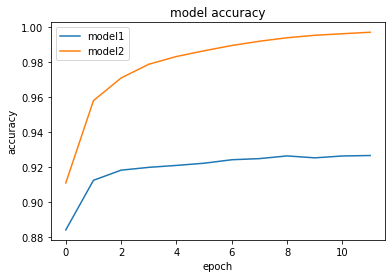

In [18]:
#plot the models
print(history.history.keys()) #list the dict keys

#Accuracy
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.plot(history.history['accuracy'], label = 'model1')
plt.plot(history2.history['accuracy'], label ='model2')
plt.legend()



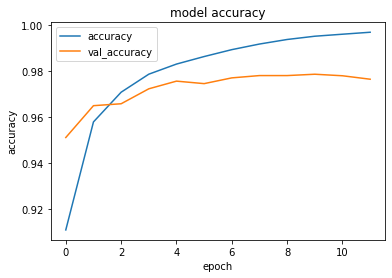

In [19]:
#Accuracy
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.plot(history2.history['accuracy'], label = 'accuracy')
plt.plot(history2.history['val_accuracy'], label ='val_accuracy')
plt.legend()

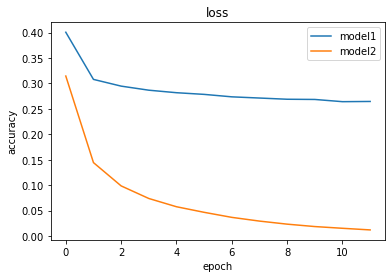

In [20]:
#loss
plt.title('loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.plot(history.history['loss'], label = 'model1')
plt.plot(history2.history['loss'], label ='model2')
plt.legend()

In [21]:
#Evaluating the model in test set
print(model.evaluate(x=x_test, y=y_test))
print(model2.evaluate(x=x_test, y=y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.3197 - accuracy: 0.9100
[0.31973183155059814, 0.9100000262260437]
313/313 [==============================] - 1s 2ms/step - loss: 0.0771 - accuracy: 0.9779
[0.07710346579551697, 0.9779000282287598]


### Question 9: 
Discuss with your group, then describe to your teacher, how this training history
differs from the previous model, for the training and validation sets. Describe what
this tells us about the generalisation of the model.

**Answer:**

The non-linear model 2 performs significantly better than the first model. The validation loss from Model 1 (0.2844) decreases significantly (0.0847) and the model accuracy increases by almost 5%. Still there was quite the gap between the validation and the training data, showing that both models even though they were imporved, may not be well suited for a general use. The first model as linear the performance dont change too much in train and test set, but the non-linear function improves it by almost 5%. 

Now we can see the model is a little bit overfitted with difference from train and test set (~2%), so the generalization of the model is not so good anymore.

## Test a Single Image

In [22]:
#LOADING IMAGE (SHOULD BE SAVE IN 28X28)
path = r'C:\Users\hansf\Documents\GitHub\NetworkAnalysis\week_1\2.png'
image = tf.keras.preprocessing.image.load_img(path, color_mode='grayscale')
image = image.resize((28, 28))
input_arr = keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
#input_arr = np.reshape(input_arr, (784,)) #convert to same as input
input_arr = input_arr / 255
predictions = model2.predict(input_arr.reshape(1,784))

#probabilities of each number!
for i in range(0,10):
    print('#',i,round(predictions[0][i],2))
#show input image
print("\n Image Loaded:")

image


# 0 0.0
# 1 0.0
# 2 1.0
# 3 0.0
# 4 0.0
# 5 0.0
# 6 0.0
# 7 0.0
# 8 0.0
# 9 0.0

 Image Loaded:


In [76]:
import random
#select 5 random images to predict and compare with real values
for i in range(0,2):
    
    row_number = random.randint(0, 10000)
    predictions = model2.predict(x_test[row_number].reshape(1,784))

    print('Prediction row', row_number)
    #probabilities of each number!
    for i in range(0,10):
        print('#',i,round(predictions[0][i],3))
    #show input image
    #image
    print('Real Values')
    #probabilities of each number!
    for i in range(0,10):
        print('#',i,round(y_test[row_number][i],2))
    #show input image
    img = tf.keras.preprocessing.image.array_to_img(x_test[row_number].reshape(28,28,1))
    display(img)
    
    print("check with argmax", np.argmax(predictions))
    print()

Prediction row 6647
# 0 0.0
# 1 0.0
# 2 0.0
# 3 0.0
# 4 1.0
# 5 0.0
# 6 0.0
# 7 0.0
# 8 0.0
# 9 0.0
Real Values
# 0 0.0
# 1 0.0
# 2 0.0
# 3 0.0
# 4 1.0
# 5 0.0
# 6 0.0
# 7 0.0
# 8 0.0
# 9 0.0


check with argmax 4

Prediction row 3371
# 0 1.0
# 1 0.0
# 2 0.0
# 3 0.0
# 4 0.0
# 5 0.0
# 6 0.0
# 7 0.0
# 8 0.0
# 9 0.0
Real Values
# 0 1.0
# 1 0.0
# 2 0.0
# 3 0.0
# 4 0.0
# 5 0.0
# 6 0.0
# 7 0.0
# 8 0.0
# 9 0.0


check with argmax 0



In [86]:
from PIL import ImageTk, Image, ImageDraw
import PIL
from tkinter import *

def draw():
    width = 100  # canvas width
    height = 100 # canvas height
    center = height//2
    white = (255, 255, 255) # canvas back

    def save():
        # save image to hard drive
        filename = "user_input.jpg"
        output_image.save(filename)

    def paint(event):
        x1, y1 = (event.x - 1), (event.y - 1)
        x2, y2 = (event.x + 1), (event.y + 1)
        canvas.create_oval(x1, y1, x2, y2, fill="black",width=5)
        draw.line([x1, y1, x2, y2],fill="white",width=5)

    master = Tk()

    # create a tkinter canvas to draw on
    canvas = Canvas(master, width=width, height=height, bg='white')
    canvas.pack()

    # create an empty PIL image and draw object to draw on
    output_image = PIL.Image.new("L", (width, height))
    draw = ImageDraw.Draw(output_image)
    canvas.pack(expand=YES, fill=BOTH)
    canvas.bind("<B1-Motion>", paint)

    # add a button to save the image
    button=Button(text="save",command=save)
    button.pack()

    master.mainloop()

In [87]:
draw() #call function to draw! U need to close the canvas!
path = r'C:\Users\hansf\Documents\GitHub\NetworkAnalysis\week_1\user_input.jpg'
image = tf.keras.preprocessing.image.load_img(path, color_mode='grayscale')
image = image.resize((28, 28))
input_arr = keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
#input_arr = np.reshape(input_arr, (784,)) #convert to same as input
input_arr = input_arr / 255
predictions = model2.predict(input_arr.reshape(1,784))

#probabilities of each number!
for i in range(0,10):
    print('#',i,round(predictions[0][i],2))
#show input image
print("\n Image Loaded:")

image

# 0 0.0
# 1 0.01
# 2 0.0
# 3 0.0
# 4 0.0
# 5 0.0
# 6 0.97
# 7 0.02
# 8 0.0
# 9 0.0

 Image Loaded:


In [75]:
input_arr.shape

(1, 28, 28, 1)